# Car Price Prediction

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error 

: 

## show Data

In [119]:
df = pd.read_csv("car details v4.csv")
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [120]:
df.shape

(2059, 20)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,2059.0,1.702992e+06,2.419881e+06,49000.0,484999.00,825000.0,1925000.0,35000000.0
Year,2059.0,2.016425e+03,3.363564e+00,1988.0,2014.00,2017.0,2019.0,2022.0
Kilometer,2059.0,5.422471e+04,5.736172e+04,0.0,29000.00,50000.0,72000.0,2000000.0
Length,1995.0,4.280861e+03,4.424585e+02,3099.0,3985.00,4370.0,4629.0,5569.0
Width,1995.0,1.767992e+03,1.352658e+02,1475.0,1695.00,1770.0,1831.5,2220.0
Height,1995.0,1.591735e+03,1.360740e+02,1165.0,1485.00,1545.0,1675.0,1995.0
Seating Capacity,1995.0,5.306266e+00,8.221701e-01,2.0,5.00,5.0,5.0,8.0
Fuel Tank Capacity,1946.0,5.200221e+01,1.511020e+01,15.0,41.25,50.0,60.0,105.0


In [123]:
df.duplicated().sum()

np.int64(0)

In [124]:
#EDA

## EDA

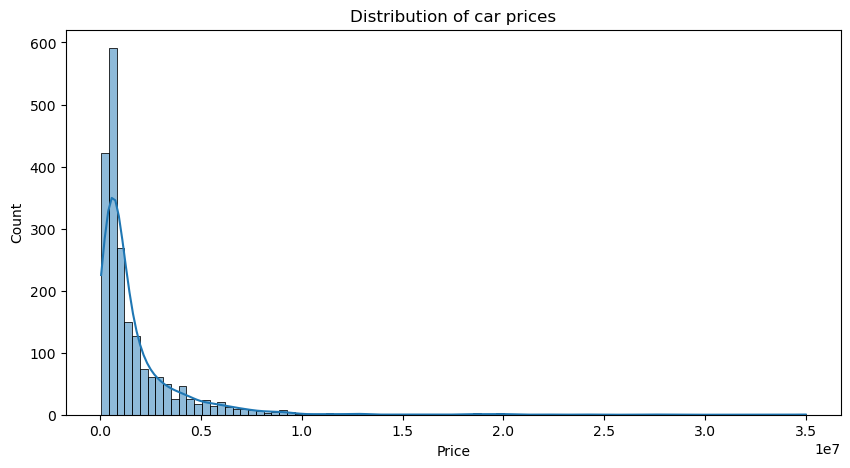

In [125]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price'],kde=True)
plt.title("Distribution of car prices")
plt.show()

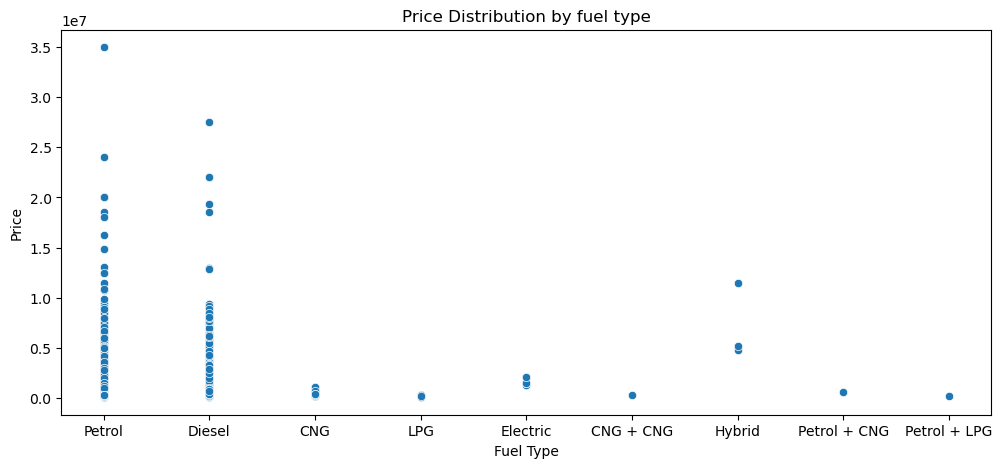

In [126]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='Fuel Type',y='Price')
plt.title("Price Distribution by fuel type")
plt.show()


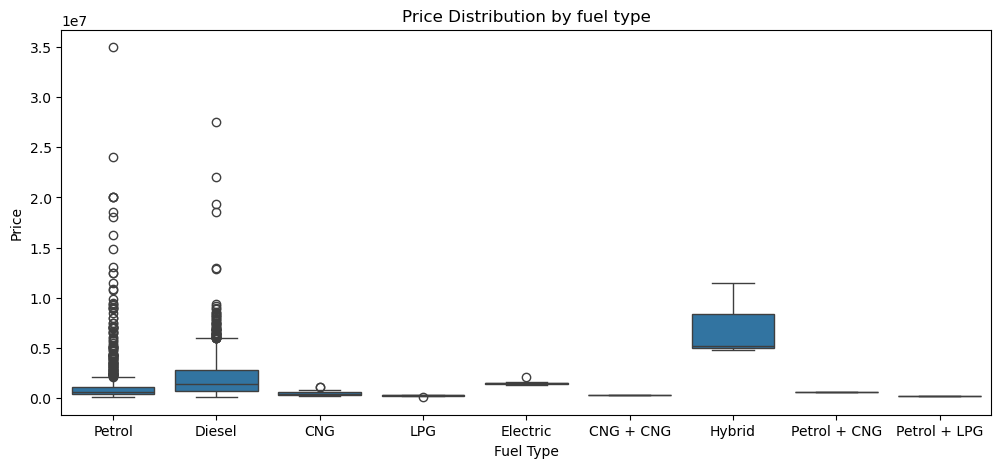

In [127]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Fuel Type',y='Price')
plt.title("Price Distribution by fuel type")
plt.show()

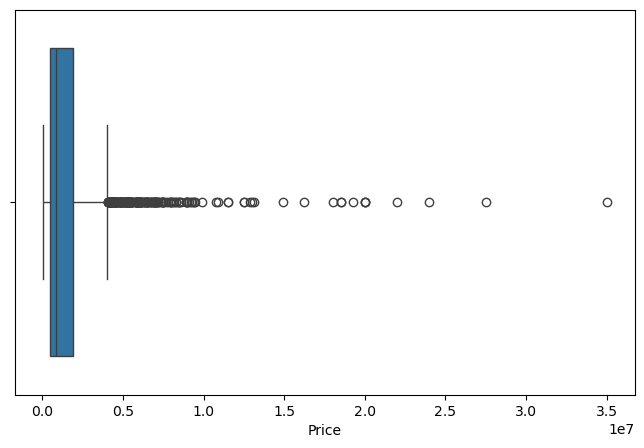

In [128]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Price')
plt.show()

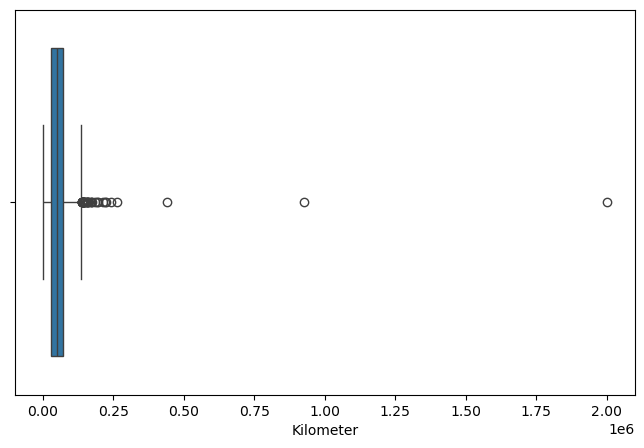

In [129]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Kilometer')
plt.show()

## Data Cleaning 

### Outliers

In [132]:
df['Price']=np.log(df['Price'])

#----------------------------------------------

# def get_outlier_limits(df, col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     return lower, upper

# lower_p, upper_p = get_outlier_limits(df, 'Price')

# outliers_count = df[(df['Price'] < lower_p) | (df['Price'] > upper_p)].shape[0]
# print(f"outliers count: {outliers_count}")


# df = df[(df['Price'] >= lower_p) & (df['Price'] <= upper_p)]


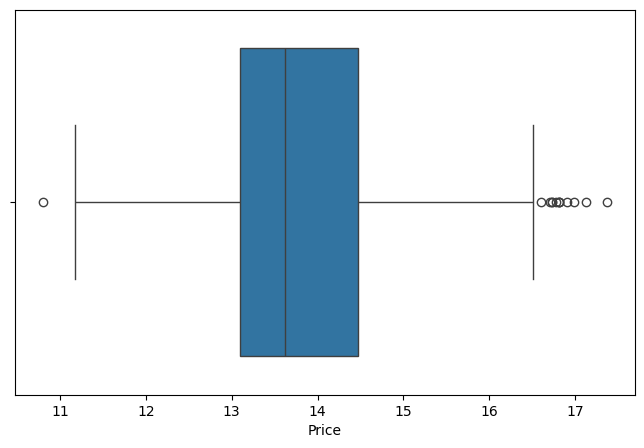

In [133]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Price')
plt.show()

In [134]:
def get_outlier_limits(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

lower_p, upper_p = get_outlier_limits(df, 'Kilometer')

outliers_count = df[(df['Kilometer'] < lower_p) | (df['Kilometer'] > upper_p)].shape[0]
print(f"outliers count: {outliers_count}")


df = df[(df['Kilometer'] >= lower_p) & (df['Kilometer'] <= upper_p)]


outliers count: 36


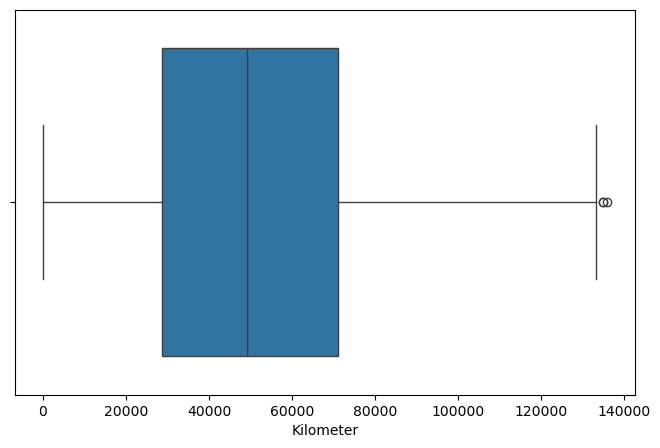

In [135]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Kilometer')
plt.show()

## Feature Enginnering

In [137]:
# remove 'cc' from Engine column
df['Engine']=df['Engine'].str.replace('cc','').astype(float)

In [138]:
# max power column
df['Max Power']=df['Max Power'].astype(str)
df['Max Power']=df['Max Power'].str.split(' ').str[0] 
df['Max Power']=pd.to_numeric(df['Max Power'] ,errors='coerce')

In [139]:
# Max Torque column
df['Max Torque']=df['Max Torque'].astype(str)
df['Max Torque']=df['Max Torque'].str.split(' ').str[0] 
df['Max Torque']=pd.to_numeric(df['Max Torque'] ,errors='coerce')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2023 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2023 non-null   object 
 1   Model               2023 non-null   object 
 2   Price               2023 non-null   float64
 3   Year                2023 non-null   int64  
 4   Kilometer           2023 non-null   int64  
 5   Fuel Type           2023 non-null   object 
 6   Transmission        2023 non-null   object 
 7   Location            2023 non-null   object 
 8   Color               2023 non-null   object 
 9   Owner               2023 non-null   object 
 10  Seller Type         2023 non-null   object 
 11  Engine              1944 non-null   float64
 12  Max Power           1825 non-null   float64
 13  Max Torque          1825 non-null   float64
 14  Drivetrain          1893 non-null   object 
 15  Length              1960 non-null   float64
 16  Width      

### Missing value

In [142]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 79
Max Power             198
Max Torque            198
Drivetrain            130
Length                 63
Width                  63
Height                 63
Seating Capacity       63
Fuel Tank Capacity    111
dtype: int64

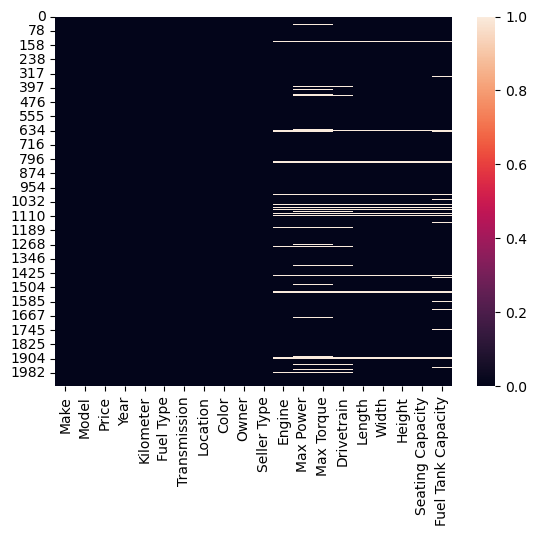

In [143]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
 # numerical columns 
numerical_columns = ['Engine','Max Power','Max Torque','Length','Height','Width','Fuel Tank Capacity']
for col in numerical_columns:
    df[col]= df[col].fillna(df[col].median())

In [145]:
df['Drivetrain'].value_counts()

Drivetrain
FWD    1316
RWD     311
AWD     266
Name: count, dtype: int64

In [146]:
# categorical columns
df['Drivetrain']= df.groupby(['Make','Model'])['Drivetrain'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))
df['Seating Capacity']= df.groupby(['Make','Model'])['Seating Capacity'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [147]:
df['Seating Capacity']=df['Seating Capacity'].replace("Unknown","5")
df['Seating Capacity']=pd.to_numeric(df['Seating Capacity']).fillna(5).astype(int)

In [148]:
print(df.isnull().sum())  #done 💀🤩

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64


In [149]:
df.head(2)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,13.132314,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,87.0,109.0,FWD,3990.0,1680.0,1505.0,5,35.0
1,Maruti Suzuki,Swift DZire VDI,13.017003,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,74.0,190.0,FWD,3995.0,1695.0,1555.0,5,42.0


## Encoding

In [151]:
df['Make'].value_counts()

Make
Maruti Suzuki    436
Hyundai          345
Mercedes-Benz    169
Honda            157
Audi             124
Toyota           121
BMW              120
Mahindra         113
Tata              55
Volkswagen        50
Ford              48
Renault           42
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           14
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: count, dtype: int64

In [152]:
columns =['Make','Model','Fuel Type','Location','Color','Owner','Drivetrain','Seller Type']

for col in columns :
    df[col]=LabelEncoder().fit_transform(df[col])


In [153]:
df['Transmission'].value_counts()

Transmission
Manual       1109
Automatic     914
Name: count, dtype: int64

In [154]:
df = pd.get_dummies(df, columns= ['Transmission'] , dtype=int ,drop_first=True)

In [155]:
df[col]=pd.to_numeric(df[col]).astype(int)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2023 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 2023 non-null   int64  
 1   Model                2023 non-null   int64  
 2   Price                2023 non-null   float64
 3   Year                 2023 non-null   int64  
 4   Kilometer            2023 non-null   int64  
 5   Fuel Type            2023 non-null   int64  
 6   Location             2023 non-null   int64  
 7   Color                2023 non-null   int64  
 8   Owner                2023 non-null   int64  
 9   Seller Type          2023 non-null   int64  
 10  Engine               2023 non-null   float64
 11  Max Power            2023 non-null   float64
 12  Max Torque           2023 non-null   float64
 13  Drivetrain           2023 non-null   int64  
 14  Length               2023 non-null   float64
 15  Width                2023 non-null   float6

In [157]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Transmission_Manual
0,7,105,13.132314,2017,87150,6,56,7,1,1,1198.0,87.0,109.0000,1,3990.0,1680.0,1505.0,5,35.0,1
1,19,790,13.017003,2014,75000,2,40,15,3,2,1248.0,74.0,190.0000,1,3995.0,1695.0,1555.0,5,42.0,1
2,8,1016,12.301383,2011,67000,6,39,8,1,2,1197.0,79.0,112.7619,1,3585.0,1595.0,1550.0,5,35.0,1
3,30,486,13.591116,2019,37500,6,41,13,1,2,1197.0,82.0,113.0000,1,3995.0,1745.0,1510.0,5,37.0,1
4,30,541,14.483340,2018,69000,2,45,7,1,2,2393.0,148.0,343.0000,2,4735.0,1830.0,1795.0,7,55.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,18,985,13.652992,2016,90300,2,67,15,1,2,2179.0,138.0,330.0000,1,4585.0,1890.0,1785.0,7,70.0,1
2055,8,409,12.524526,2014,83000,6,1,15,3,2,814.0,55.0,75.0000,1,3495.0,1550.0,1500.0,5,32.0,1
2056,6,450,12.388394,2013,73000,6,68,14,1,2,1196.0,70.0,102.0000,1,3795.0,1680.0,1427.0,5,45.0,1
2057,1,13,15.271797,2018,60474,2,12,15,1,2,1995.0,188.0,400.0000,2,4936.0,1868.0,1479.0,5,65.0,0


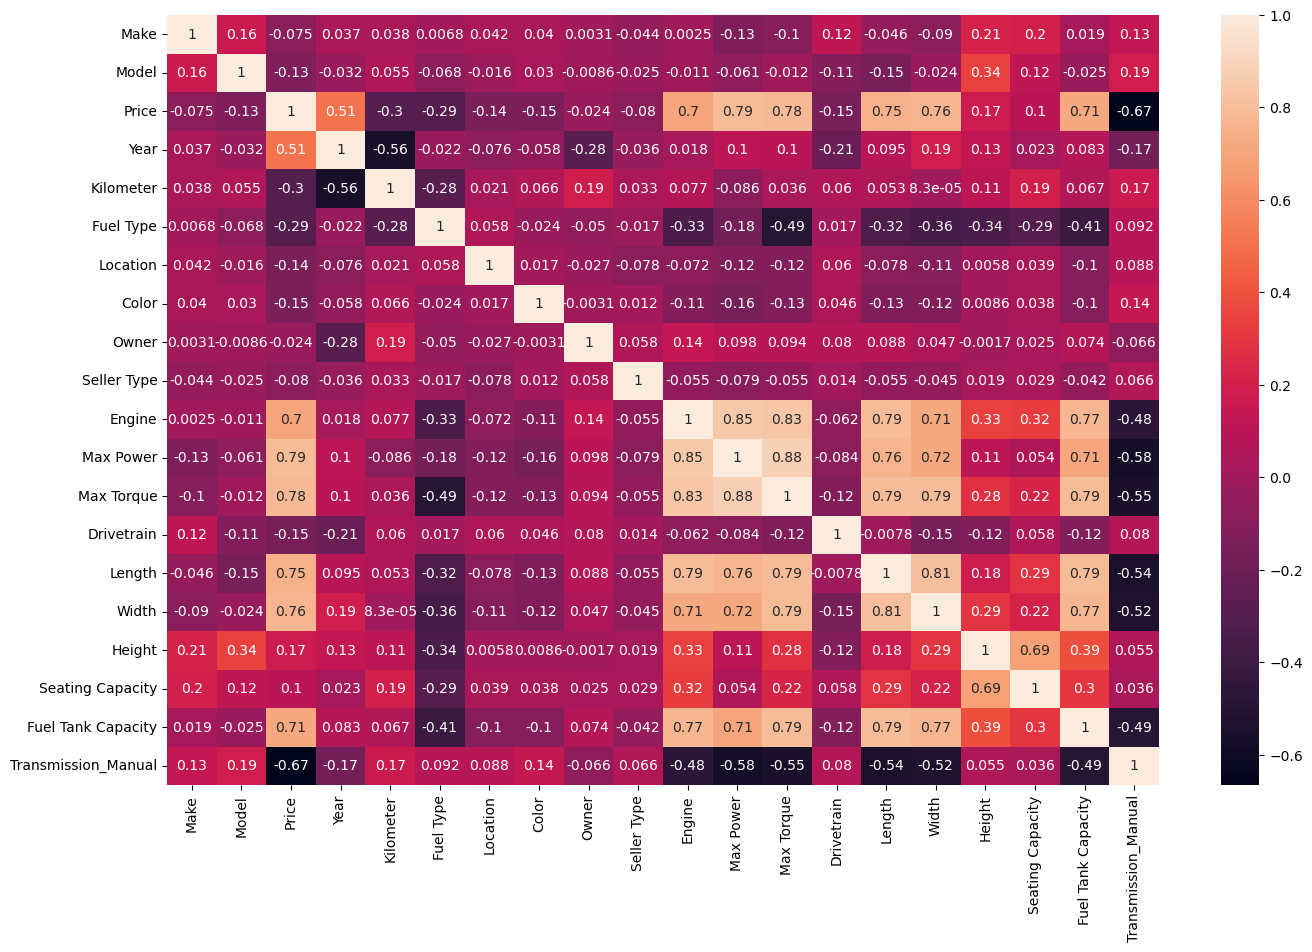

In [158]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [163]:
# df=df.drop(['Max Torque'] ,axis=1, inplace =True)

In [160]:
#اذا كان الموديل سيء الرجوع وحذف الاعمدة الاكثر ارتباط

## Build Modil

In [ ]:
X = df.drop(['Price'] ,axis = 1, inplace = False)
y = df['Price']

AttributeError: 'NoneType' object has no attribute 'drop'

In [ ]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)


print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1618, 19)
X_test shape is  (405, 19)
y_train shape is  (1618,)
y_test shape is  (405,)


In [ ]:

LinearRegressionModel = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

#Calculating Details
#print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
#print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
#print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
#print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

# Prediction
y_pred = LinearRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])

Predicted Value for Linear Regression is :  [13.65086589 13.20235905 12.64193729 12.04585464 13.98631979 16.52176643
 14.15537918 12.98575502 14.80664397 12.73793757]


In [ ]:
y[:10]

0    13.132314
1    13.017003
2    12.301383
3    13.591116
4    14.483340
5    13.422468
6    14.456837
7    14.790070
8    14.144814
9    13.262125
Name: Price, dtype: float64

In [ ]:
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  0.09703886573623084


## Try Another Algorithm and diside

In [ ]:

SGDRegressionModel = SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber')
LassoRegressionModel = Lasso(alpha=1.0,random_state=33)
RidgeRegressionModel = Ridge(alpha=1.0,random_state=33)
RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=8, random_state=33)
GBRModel = GradientBoostingRegressor(n_estimators=500,max_depth=7,learning_rate = 1.5 ,random_state=33)
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') 
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',algorithm = 'auto')    


Models = [SGDRegressionModel,LassoRegressionModel,RidgeRegressionModel,RandomForestRegressorModel,
          GBRModel,SVRModel,DecisionTreeRegressorModel,KNeighborsRegressorModel]

for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    y_pred = Model.predict(X_test)
    print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
    print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
    print('=================================================')

for Model SGDRegressor
MAE value is  : 24645.370032131086
MSE value is  : 731131768.713109
MdSE value is  : 23938.490796890354
for Model Lasso
MAE value is  : 0.33319854377684527
MSE value is  : 0.20083980615491343
MdSE value is  : 0.2713218077902475
for Model Ridge
MAE value is  : 0.21393912818711497
MSE value is  : 0.0970363888916641
MdSE value is  : 0.1625041814028254
for Model RandomForestRegressor
MAE value is  : 0.1589716191349523
MSE value is  : 0.05587543872177345
MdSE value is  : 0.11101114041551163
for Model GradientBoostingRegressor
MAE value is  : 0.2833144211576629
MSE value is  : 0.17151520956502753
MdSE value is  : 0.19354797611225294
for Model SVR
MAE value is  : 0.5871373051571852
MSE value is  : 0.5367003979240789
MdSE value is  : 0.5295679137729756
for Model DecisionTreeRegressor
MAE value is  : 0.3510697276618275
MSE value is  : 0.22704793927221742
MdSE value is  : 0.2672900518526262
for Model KNeighborsRegressor
MAE value is  : 0.46434941902437415
MSE value is  : 0

## Applying Random Forest Regressor Model 

In [ ]:
#Applying Random Forest Regressor Model 

RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

# Prediction
y_pred = RandomForestRegressorModel.predict(X_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Predicted Value for Random Forest Regressor is :  [14.77711883 13.42984954 12.80286528 12.29236446 14.02584969 16.16512551
 14.38929945 13.26071212 15.05743133 12.83643553]


In [ ]:
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  0.054441292418701576
